## convolution using scipy

In [1]:
import numpy as np
from scipy.signal import convolve2d
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")

In [2]:
img_n = 20
image = np.random.randn(img_n, img_n)

kernel_n = 7
Y, X = np.meshgrid(np.linspace(-3, 3, kernel_n), np.linspace(-3, 3, kernel_n))
kernel = np.exp( -(X**2 + Y**2)/7 )

In [3]:
X, Y

(array([[-3., -3., -3., -3., -3., -3., -3.],
        [-2., -2., -2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.,  3.,  3.]]),
 array([[-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.]]))

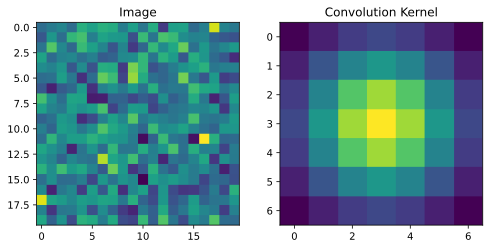

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(image)
ax[0].set_title("Image")

ax[1].imshow(kernel)
ax[1].set_title("Convolution Kernel")

plt.show()

In [5]:
# manually convolve
conv_output = np.zeros((img_n, img_n))
half_kernel_n = kernel_n // 2

for row_i in range(half_kernel_n, img_n - half_kernel_n):
    for col_i in range(half_kernel_n, img_n - half_kernel_n):
        piece_of_img = image[row_i - half_kernel_n: row_i+half_kernel_n+1,:]
        piece_of_img = piece_of_img[:,col_i - half_kernel_n: col_i+half_kernel_n+1]

        dot_product = np.sum( piece_of_img*kernel[::-1,::-1])
        conv_output[row_i, col_i] = dot_product

In [6]:
# using scipy
conv_output_scipy = convolve2d(image, kernel, mode="valid")

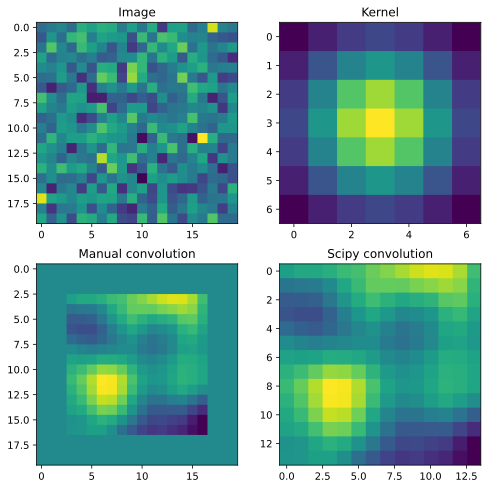

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0, 0].imshow(image)
ax[0, 0].set_title("Image")
ax[0, 1].imshow(kernel)
ax[0, 1].set_title("Kernel")
ax[1, 0].imshow(conv_output)
ax[1, 0].set_title("Manual convolution")
ax[1, 1].imshow(conv_output_scipy)
ax[1, 1].set_title("Scipy convolution")

plt.show()

In [11]:
img_url = "https://en.wikipedia.org/wiki/Stedelijk_Museum_Amsterdam#/media/File:De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg"
from skimage import io
bathtub = imread("museum.jpg")
bathtub.shape

/tmp/ipykernel_514831/2391583843.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  bathtub = imread("museum.jpg")


(1072, 1920, 3)

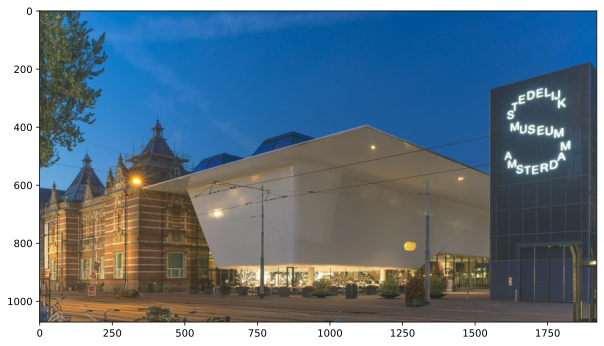

In [12]:
fig = plt.figure(figsize=(10, 6))
plt.imshow(bathtub)

In [13]:
# transform rgb to single channel
bathtub = np.mean(bathtub, axis=2)
bathtub = bathtub / np.max(bathtub)
bathtub.shape

(1072, 1920)

In [15]:
# Handcrafted kernels
# VK
vk = np.array([[1, 0, -1],
               [1, 0, -1],
               [1, 0, -1]])
hk = np.array([[1, 1, 1],
               [0, 0, 0],
               [-1, -1, -1]])

In [16]:
vk.shape, hk.shape

((3, 3), (3, 3))

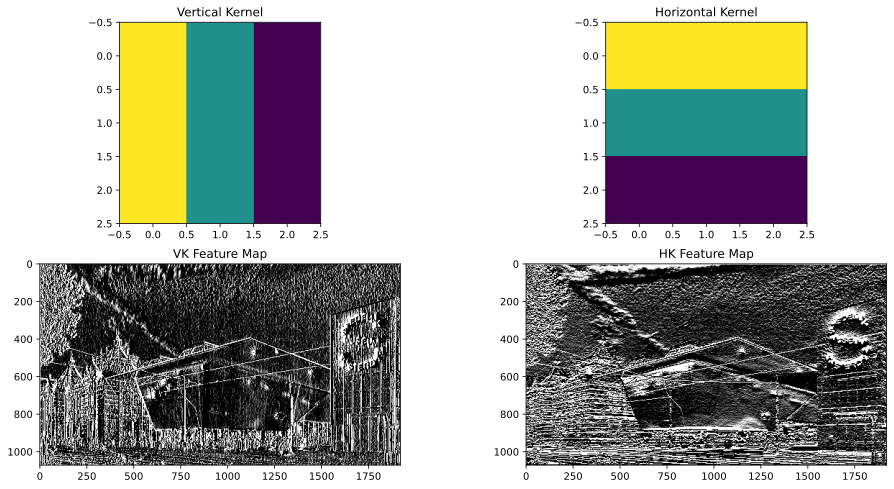

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
ax[0, 0].imshow(vk)
ax[0, 0].set_title("Vertical Kernel")
ax[0, 1].imshow(hk)
ax[0, 1].set_title("Horizontal Kernel")

conv_res = convolve2d(bathtub, vk, mode="same")
ax[1, 0].imshow(conv_res, cmap="gray", vmin=0, vmax=.01)
ax[1, 0].set_title("VK Feature Map")

conv_res = convolve2d(bathtub, hk, mode="same")
ax[1, 1].imshow(conv_res, cmap="gray", vmin=0, vmax=.01)
ax[1, 1].set_title("HK Feature Map")

plt.show()

## Now in Pytorch

In [22]:
import torch

In [23]:
vk_t = torch.tensor(vk).view(1, 1, 3, 3).double()
hk_t = torch.tensor(hk).view(1, 1, 3, 3).double()
bathtub_t = torch.tensor(bathtub).view(1, 1, *bathtub.shape)

vk_t.shape, hk_t.shape, bathtub_t.shape

(torch.Size([1, 1, 3, 3]),
 torch.Size([1, 1, 3, 3]),
 torch.Size([1, 1, 1072, 1920]))

In [24]:
conv_res_t = torch.conv2d(bathtub_t, vk_t)
bathtub.shape, conv_res_t.shape

torch.Size([1, 1, 1070, 1918])

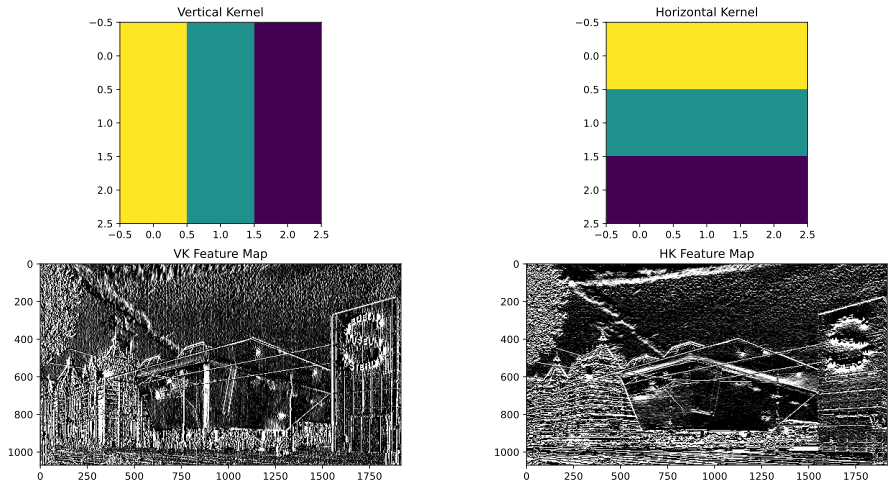

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

ax[0, 0].imshow(vk_t.detach().view(3, 3))
ax[0, 0].set_title("Vertical Kernel")
ax[0, 1].imshow(hk_t.detach().view(3, 3))
ax[0, 1].set_title("Horizontal Kernel")
ax[1, 0].imshow(conv_res_t.detach().view(1070, 1918), cmap="gray", vmin=0, vmax=.01)
ax[1, 0].set_title("VK Feature Map")
conv_res_t = torch.conv2d(bathtub_t, hk_t)
ax[1, 1].imshow(conv_res_t.detach().view(1070, 1918), cmap="gray", vmin=0, vmax=.01)
ax[1, 1].set_title("HK Feature Map")

plt.show()

In [28]:
bathtub.shape, conv_res_t.shape

((1072, 1920), torch.Size([1, 1, 1070, 1918]))

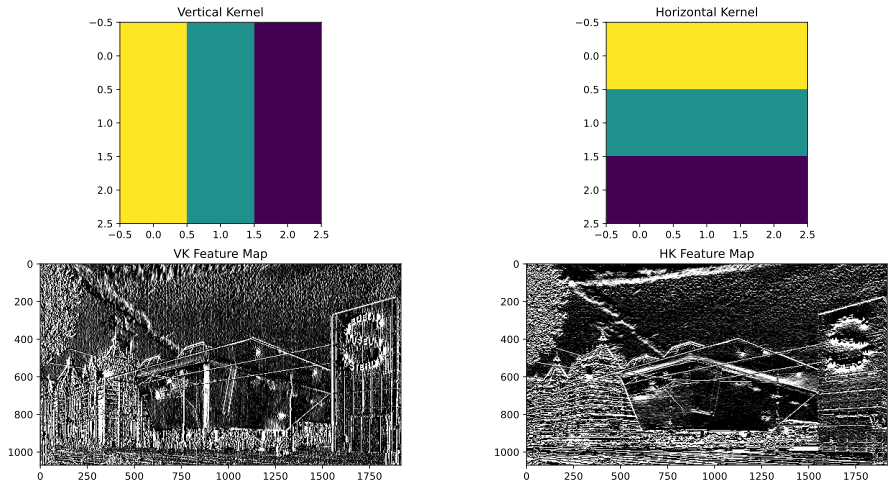

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

ax[0, 0].imshow(vk_t.detach().view(3, 3))
ax[0, 0].set_title("Vertical Kernel")
ax[0, 1].imshow(hk_t.detach().view(3, 3))
ax[0, 1].set_title("Horizontal Kernel")
conv_res_t = torch.conv2d(bathtub_t, vk_t)
ax[1, 0].imshow(torch.squeeze(conv_res_t.detach()), cmap="gray", vmin=0, vmax=.01)
ax[1, 0].set_title("VK Feature Map")
conv_res_t = torch.conv2d(bathtub_t, hk_t)
ax[1, 1].imshow(torch.squeeze(conv_res_t.detach()), cmap="gray", vmin=0, vmax=.01)
ax[1, 1].set_title("HK Feature Map")

plt.show()